# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook.

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up. 

In [206]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-21 14:12:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.4’

pizza_steak.zip.4   100%[===================>] 104.47M  22.6MB/s    in 5.6s    

2023-01-21 14:12:11 (18.5 MB/s) - ‘pizza_steak.zip.4’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [207]:
!ls pizza_steak

test  train


In [208]:
!ls pizza_steak/train

pizza  steak


In [209]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [210]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [211]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically. 

In [212]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [213]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['3792514.jpg']
Image shape: (512, 512, 3)


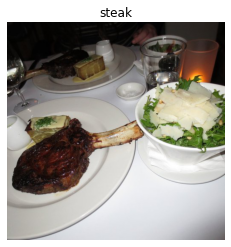

In [214]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

['2885050.jpg']
Image shape: (512, 512, 3)


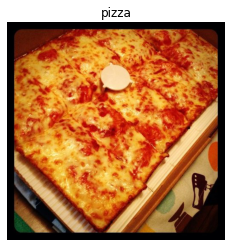

In [215]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [216]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]]], dtype=uint8)>

In [217]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [218]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        ...,
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314]],

       ...,

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data




In [219]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
                                               
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 194ms/step - loss: 0.5330 - accuracy: 0.7187 - val_loss: 0.4604 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4308 - accuracy: 0.8073 - val_loss: 0.3465 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3840 - accuracy: 0.8260 - val_loss: 0.3427 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3890 - accuracy: 0.8273 - val_loss: 0.3385 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3372 - accuracy: 0.8620 - val_loss: 0.2960 - val_accuracy: 0.8760


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure using GPU. 

In [220]:
# Get a model summary
model_1.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_62 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_64 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

## Using the same model as before



In [221]:
# Set random seed
tf.random.set_seed(42)

# Create a modelto replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 180ms/step - loss: 0.7078 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [222]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 150528)            0         
                                                                 
 dense_48 (Dense)            (None, 4)                 602116    
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly.

In [223]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but with more layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histor_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 2.1085 - accuracy: 0.6413 - val_loss: 0.5169 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.9072 - accuracy: 0.7007 - val_loss: 1.0128 - val_accuracy: 0.5660
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.8642 - accuracy: 0.6980 - val_loss: 0.6215 - val_accuracy: 0.6640
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.9243 - accuracy: 0.7113 - val_loss: 0.5564 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 1.0623 - accuracy: 0.6980 - val_loss: 1.2835 - val_accuracy: 0.5800


In [224]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 150528)            0         
                                                                 
 dense_51 (Dense)            (None, 100)               15052900  
                                                                 
 dense_52 (Dense)            (None, 100)               10100     
                                                                 
 dense_53 (Dense)            (None, 100)               10100     
                                                                 
 dense_54 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment)

### 1. Become one with the data

['252858.jpg']
Image shape: (382, 512, 3)
['2785084.jpg']
Image shape: (366, 512, 3)


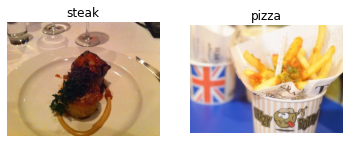

In [225]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [226]:
# Deifne directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Next step is to turn our data into **batches.**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time. 

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well. 

In [227]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trian_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [228]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [229]:
# Get a sample of train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [230]:
# How many batches are there?
len(train_data)

47

In [231]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [232]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline. 

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem). 

In [233]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [234]:
# Create the model (this will be our baseline, a three layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size o the sliding window going across an input  
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [235]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [236]:
# Get a summary of our model
model_4.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_66 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_67 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_30 (Flatten)        (None, 475240)            0         
                                                                 
 dense_55 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [237]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [238]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 194ms/step - loss: 1.5764 - accuracy: 0.6373 - val_loss: 0.4857 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4464 - accuracy: 0.8060 - val_loss: 0.4310 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3097 - accuracy: 0.8813 - val_loss: 0.3827 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.1690 - accuracy: 0.9453 - val_loss: 0.4341 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.0653 - accuracy: 0.9853 - val_loss: 0.6658 - val_accuracy: 0.7820


In [239]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.2960 - accuracy: 0.8760


[0.29601848125457764, 0.8759999871253967]

In [240]:
model_1.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_62 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_64 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

### 5. Evaluating our model

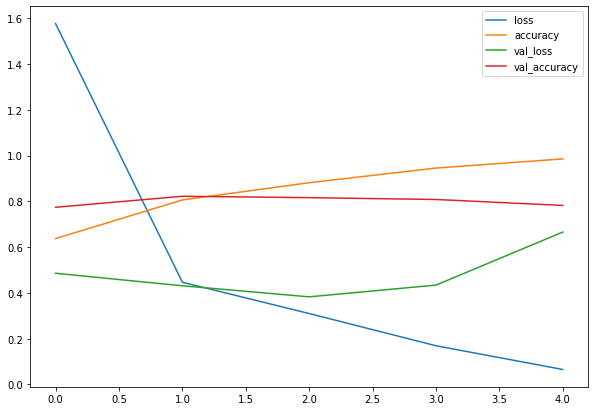

In [241]:
# Plotting the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [242]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrcis.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy") 
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.  

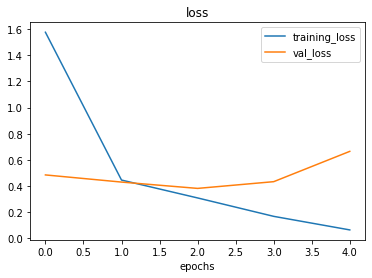

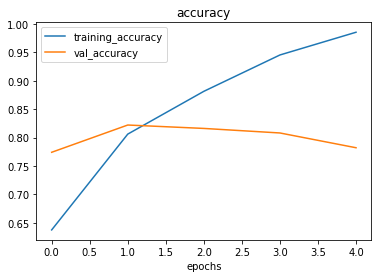

In [243]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [244]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [245]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [246]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6176 - accuracy: 0.6727 - val_loss: 0.4831 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4608 - accuracy: 0.7927 - val_loss: 0.3973 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4322 - accuracy: 0.8207 - val_loss: 0.3864 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4284 - accuracy: 0.8120 - val_loss: 0.3657 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3975 - accuracy: 0.8327 - val_loss: 0.3380 - val_accuracy: 0.8660


In [247]:
model_5.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 26, 26, 10)     

In [248]:
model_4.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_66 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_67 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_30 (Flatten)        (None, 475240)            0         
                                                                 
 dense_55 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


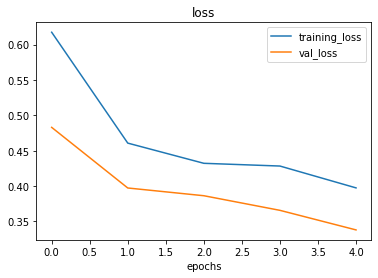

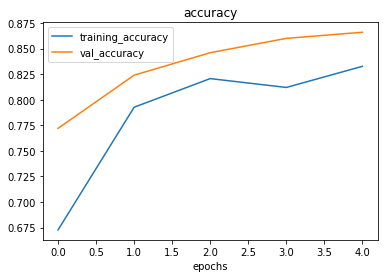

In [249]:
# Plot loss curves
plot_loss_curves(history_5)

### Data augmentation

In [250]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [251]:
# Import data and augment it from training directory
print("Augmented training data:") 
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model. 

In [252]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

showing image number: 12


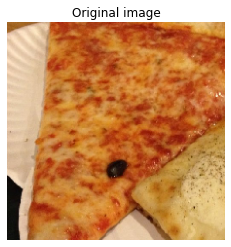

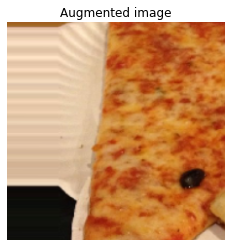

In [253]:
# Show original image and augmented image
random_number = random.randint(0, 31)  # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [254]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 457ms/step - loss: 0.7463 - accuracy: 0.3873 - val_loss: 0.6879 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6977 - accuracy: 0.5207 - val_loss: 0.6893 - val_accuracy: 0.6960
Epoch 3/5
47/47 [==============================] - 21s 446ms/step - loss: 0.6906 - accuracy: 0.5127 - val_loss: 0.6759 - val_accuracy: 0.6460
Epoch 4/5
47/47 [==============================] - 21s 452ms/step - loss: 0.6797 - accuracy: 0.6500 - val_loss: 0.6279 - val_accuracy: 0.6000
Epoch 5/5
47/47 [==============================] - 21s 445ms/step - loss: 0.6361 - accuracy: 0.6813 - val_loss: 0.8528 - val_accuracy: 0.5740


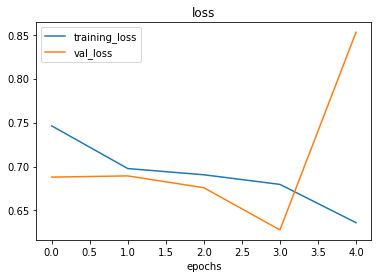

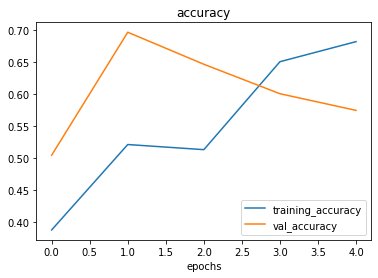

In [256]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) and see what happens.

In [257]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size=(224, 224),
                                                                           class_mode="binary",
                                                                           batch_size=32,
                                                                           shuffle=True) # this time shuffle data

Found 1500 images belonging to 2 classes.


In [263]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffle, # we're fitting on augmented and shuffled data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data)) 

Epoch 1/5
47/47 [==============================] - 22s 448ms/step - loss: 0.6790 - accuracy: 0.5713 - val_loss: 0.5681 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 22s 468ms/step - loss: 0.5629 - accuracy: 0.7233 - val_loss: 0.3783 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 21s 449ms/step - loss: 0.4952 - accuracy: 0.7713 - val_loss: 0.4029 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 21s 448ms/step - loss: 0.4840 - accuracy: 0.7687 - val_loss: 0.3374 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 21s 447ms/step - loss: 0.4532 - accuracy: 0.8060 - val_loss: 0.3878 - val_accuracy: 0.8240


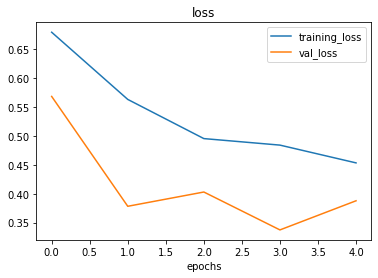

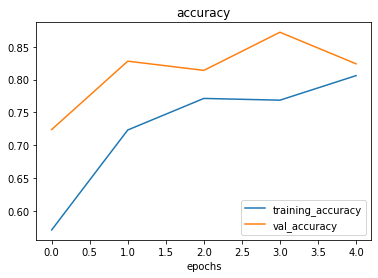

In [264]:
# Plot loss curves
plot_loss_curves(history_7)

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images.

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data
* Use **transfer learning**


In [268]:
# Create a new model
model_new = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(16, 3, activation="relu"),
    Conv2D(16, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_new.compile(loss="binary_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])

# Fit the model
history_new = model_new.fit(train_data_augmented_shuffle,
                            epochs=10,
                            steps_per_epoch=len(train_data_augmented_shuffle),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 25s 496ms/step - loss: 0.6413 - accuracy: 0.6460 - val_loss: 0.4864 - val_accuracy: 0.7800
Epoch 2/10
47/47 [==============================] - 22s 471ms/step - loss: 0.5814 - accuracy: 0.7073 - val_loss: 0.4379 - val_accuracy: 0.8220
Epoch 3/10
47/47 [==============================] - 23s 494ms/step - loss: 0.5099 - accuracy: 0.7527 - val_loss: 0.3753 - val_accuracy: 0.8420
Epoch 4/10
47/47 [==============================] - 23s 497ms/step - loss: 0.4756 - accuracy: 0.7760 - val_loss: 0.3340 - val_accuracy: 0.8540
Epoch 5/10
47/47 [==============================] - 22s 473ms/step - loss: 0.4585 - accuracy: 0.7893 - val_loss: 0.3719 - val_accuracy: 0.8340
Epoch 6/10
47/47 [==============================] - 22s 471ms/step - loss: 0.4655 - accuracy: 0.7927 - val_loss: 0.3699 - val_accuracy: 0.8420
Epoch 7/10
47/47 [==============================] - 22s 475ms/step - loss: 0.4700 - accuracy: 0.7947 - val_loss: 0.3511 - val_accuracy: 0.8600

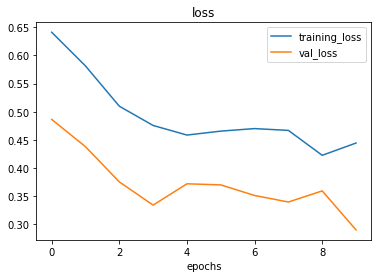

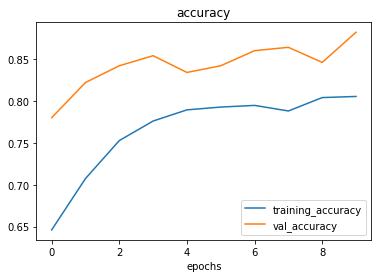

In [269]:
# Plot loss curves
plot_loss_curves(history_new)